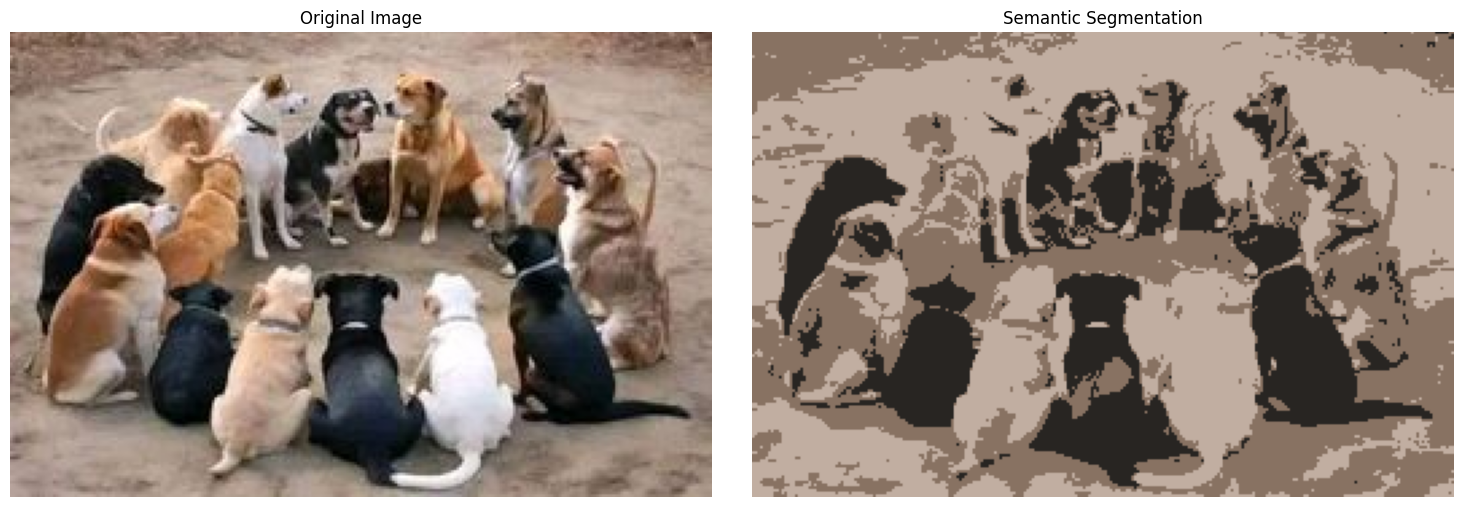

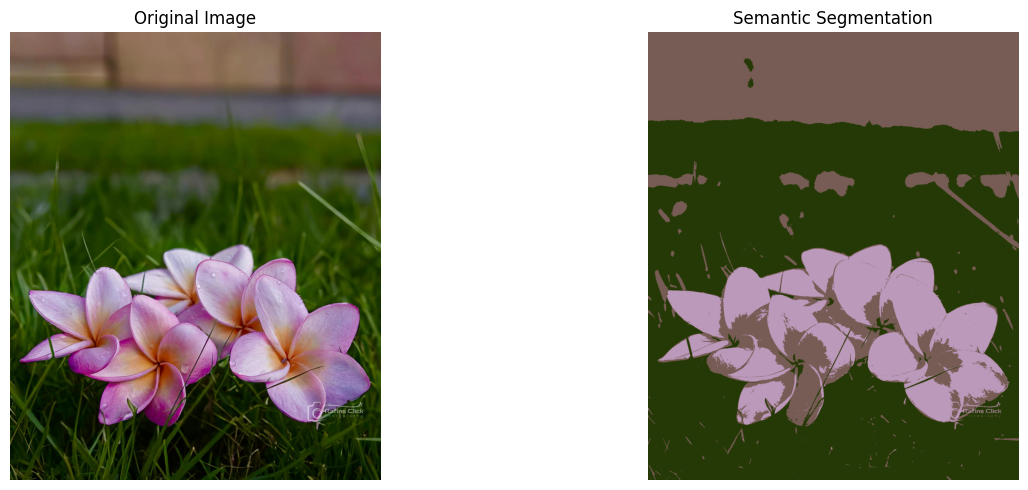

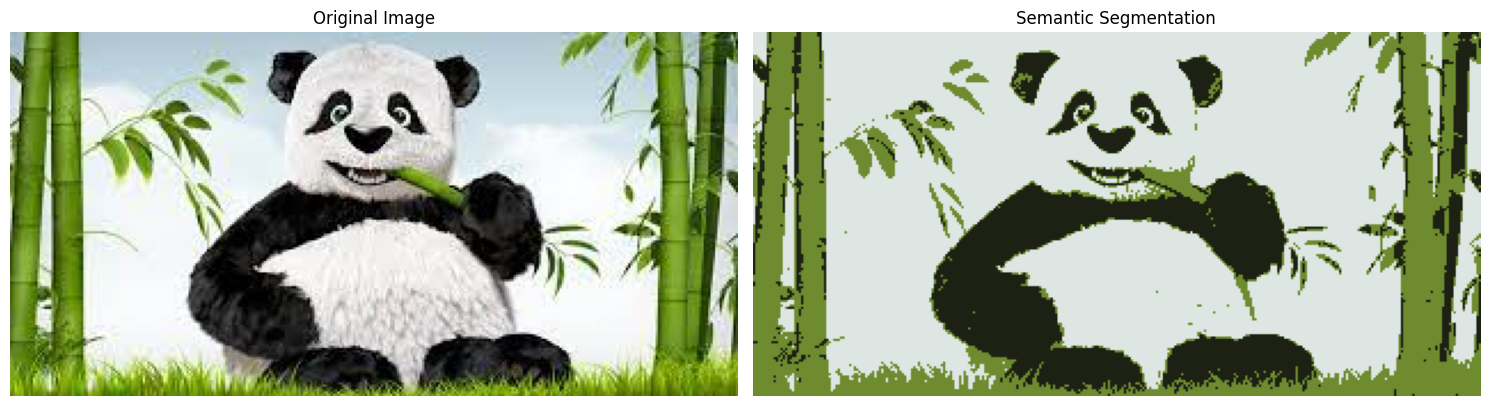

In [1]:
import cv2 as cv
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

def load_images(folder_path):
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    images = [cv.imread(image_path) for image_path in image_files]
    return images

def semantic_segmentation(images, num_clusters=3):
    """Perform semantic segmentation using K-means clustering."""
    segmented_images = []
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    for img in images:
        pixels = img.reshape((-1, 3))
        pixels = np.float32(pixels)
        _, labels, centers = cv.kmeans(pixels, num_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
        centers = np.uint8(centers)
        segmented_img = centers[labels.flatten()].reshape(img.shape)
        segmented_images.append(segmented_img)
    return segmented_images

# Load images
folder_path = "image"
images = load_images(folder_path)

# Perform segmentation
semantic_segmented_images = semantic_segmentation(images)

# Display results
for i in range(3):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(semantic_segmented_images[i], cv.COLOR_BGR2RGB))
    plt.title('Semantic Segmentation')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
